In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [85]:
#Load the raw data
df = pd.read_csv("../data/raw/Telco-Customer-Churn.csv")

#Display the first five rows
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [86]:
#Check the number of rows and columns
df.shape

(7043, 21)

In [87]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
#Get the column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [89]:
#Check for the data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [90]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

In [91]:
#Check for missing values
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: int64)

In [92]:
#Get the churn rate
df["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [93]:
#Fix TotalCharges
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].isna().sum()

np.int64(11)

In [94]:
#Drop missing rows
df = df.dropna(subset=["TotalCharges"]).copy()

In [95]:
#Remove the ID column
df = df.drop(columns=["customerID"])

In [96]:
#Compute churn rate by contract type
churn_rate_by_contract = (df.groupby("Contract")["Churn"]
      .apply(lambda x: (x == "Yes").mean())
      .sort_values(ascending=False))

churn_rate_by_contract


Contract
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
Name: Churn, dtype: float64

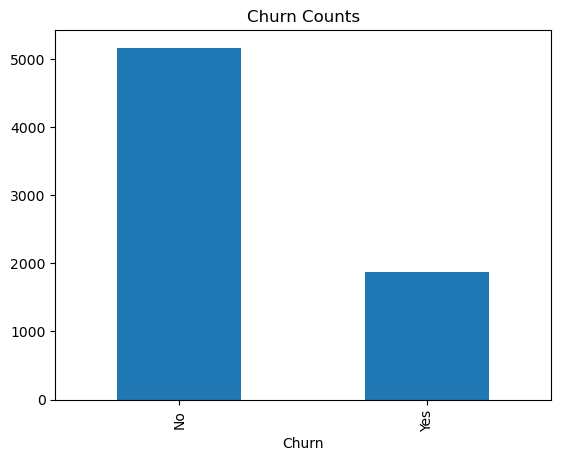

In [97]:
df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn Counts")
plt.suptitle("")
plt.show()

In [98]:
#Numeric distributions
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


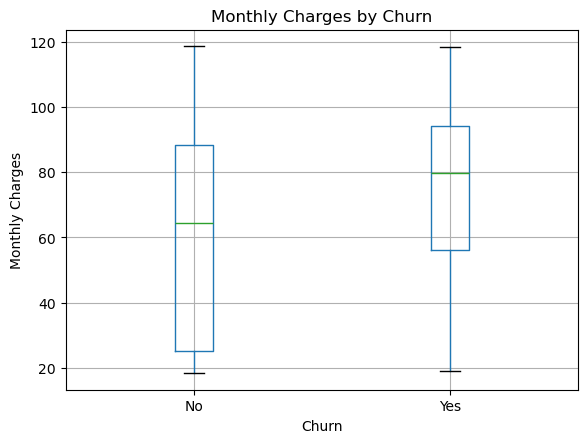

In [99]:
df.boxplot(column="MonthlyCharges", by="Churn")
plt.title("Monthly Charges by Churn")
plt.suptitle("")
plt.ylabel("Monthly Charges")
plt.xlabel("Churn")
plt.show()

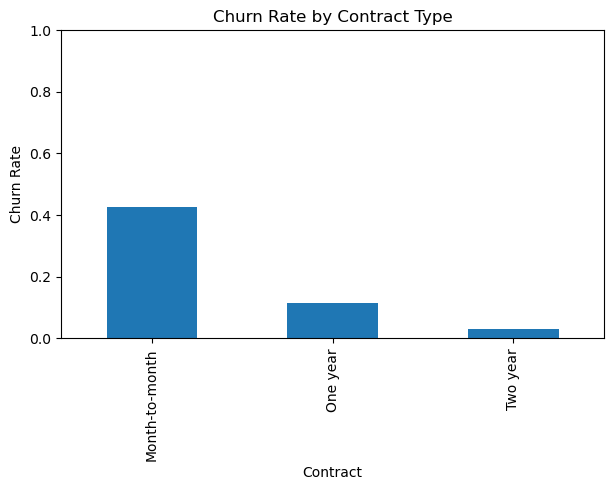

In [100]:
plt.figure(figsize=(7,4))
churn_rate_by_contract.plot(kind="bar")
plt.title("Churn Rate by Contract Type")
plt.suptitle("")
plt.ylabel("Churn Rate")
plt.xlabel("Contract")
plt.ylim(0, 1)
plt.show()

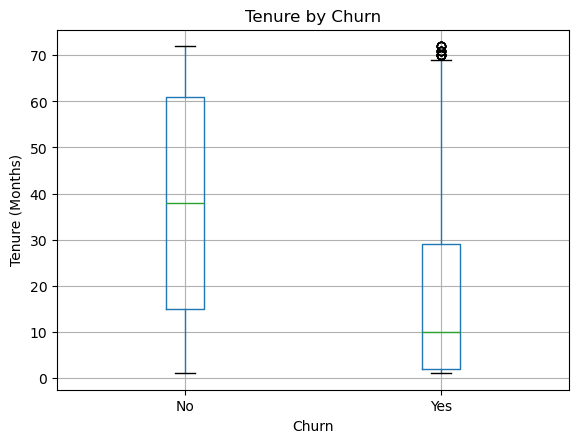

In [101]:
df.boxplot(column="tenure", by="Churn")
plt.title("Tenure by Churn")
plt.suptitle("")
plt.ylabel("Tenure (Months)")
plt.xlabel("Churn")
plt.show()

In [102]:
#Insight into the churn rate by tenure
tenure_bins = pd.cut(df["tenure"], bins=[0, 12, 24, 48, 72], include_lowest=True)
churn_by_tenure = df.groupby(tenure_bins)["Churn"].apply(lambda x: (x=="Yes").mean()).sort_index()

(churn_by_tenure * 100).round(2)

tenure
(-0.001, 12.0]    47.68
(12.0, 24.0]      28.71
(24.0, 48.0]      20.39
(48.0, 72.0]       9.51
Name: Churn, dtype: float64

In [103]:
#Save plots to the README file
plt.savefig("../reports/figures/churn_counts.png", bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

In [104]:
#List of churn drivers
cat_cols = df.select_dtypes(include="object").columns.drop("Churn")

results = []
for col in cat_cols:
    rates = df.groupby(col)["Churn"].apply(lambda x: (x=="Yes").mean())
    results.append((col, rates.max(), rates.idxmax()))

drivers = pd.DataFrame(results, columns=["feature", "max_churn_rate", "worst_group"])
drivers.sort_values("max_churn_rate", ascending=False).head(10)

,feature,max_churn_rate,worst_group
14,PaymentMethod,0.452854,Electronic check
12,Contract,0.427097,Month-to-month
5,InternetService,0.418928,Fiber optic
6,OnlineSecurity,0.417787,No
9,TechSupport,0.416475,No
7,OnlineBackup,0.399417,No
8,DeviceProtection,0.391403,No
11,StreamingMovies,0.337289,No
13,PaperlessBilling,0.335893,Yes
10,StreamingTV,0.335351,No


In [105]:
churn_percent = (df["Churn"]=="Yes").mean() * 100
print(f"Churn rate: {churn_percent:.2f}%")

Churn rate: 26.58%


EDA SUMMARY

The churn rate is 26.58%.
Churn is higher for customers with low tenure.
Churn is the highest among month-to-month contracts.
The monthly charges for churners are very high.